# Introduction to Computer Vision

In this session, we will discuss the following:

- How images are processed in python
- How images are represented as a multi-dimensional array
- How to use some OpenCV functions to manipulate images

In [1]:
# import packages needed
import matplotlib.image as mpimg
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

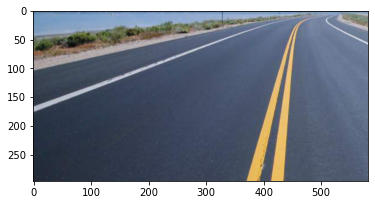

In [2]:
# read in an image
road_img = mpimg.imread('highway_lanes.jpg')

plt.imshow(road_img)  #call as plt.imshow(gray, cmap='gray') to show a grayscaled image
plt.show()

# Check out that the position (0,0) is the upper left corner of the image
#    X-axis increases as you go to the right
#    Y-axis increase as you go down

Notice that the position (0,0) is the __upper left__ corner of the image.
* X-axis increases as you go to the right
* Y-axis increase as you go down

Our image is represented as a 3 Dimensional Array.  Let's see the mathematical representation of this picture.

In [3]:
# Use the ndim to get the dimension of the ndarray

print("Dimesion of the road_img: ", road_img.ndim)

Dimesion of the road_img:  3


## What is an array in Python?

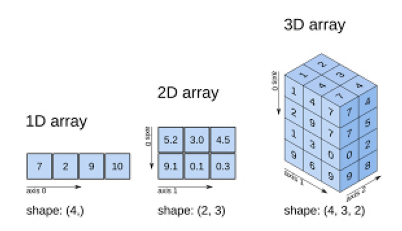

In [4]:
kinds_of_array = mpimg.imread('1d_2d_3d_array.jpg')
plt.rcParams["figure.figsize"] = [15, 4]
plt.axis('off')
plt.imshow(kinds_of_array) 
plt.show()

### Quick Introduction to arrays in Python

The examples below can be found here: https://note.nkmk.me/en/python-numpy-ndarray-ndim-shape-size/

In [5]:
# Numpy's built-in function to generate a sequence of integers

np.arange(5)

array([0, 1, 2, 3, 4])

In [6]:
a_1d = np.arange(3)
print(a_1d)

[0 1 2]


In [7]:
a_2d = np.arange(12).reshape((3, 4))
print(a_2d)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [8]:
a_3d = np.arange(24).reshape((2, 3, 4))
print(a_3d)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [9]:
print("Dimension of a_1d:", a_1d.ndim)
print("Data type of a_1d:", type(a_1d.ndim))
print("Dimension of a_2d:", a_2d.ndim)
print("Dimension of a_3d:", a_3d.ndim)

Dimension of a_1d: 1
Data type of a_1d: <class 'int'>
Dimension of a_2d: 2
Dimension of a_3d: 3


In [10]:
print("Shape of a_1d:", a_1d.shape)
print("Data Type of a_1d.shape:", type(a_1d.shape))
print("Shape of a_2d:", a_2d.shape)
print("Shape of a_3d:", a_3d.shape)

Shape of a_1d: (3,)
Data Type of a_1d.shape: <class 'tuple'>
Shape of a_2d: (3, 4)
Shape of a_3d: (2, 3, 4)


For example, in the case of a two-dimensional array, it will be (number of rows, number of columns). 
If you only want to get either the number of rows or the number of columns, you can get 
each element of the tuple.

In [11]:
print("Number of rows    in a_2d:", a_2d.shape[0])
print("Number of columns in a_2d:", a_2d.shape[1])

Number of rows    in a_2d: 3
Number of columns in a_2d: 4


In [12]:
print("Number of rows    in a_3d:", a_3d.shape[0])
print("Number of columns in a_3d:", a_3d.shape[1])
print("Number of depths  in a_3d:", a_3d.shape[2])

Number of rows    in a_3d: 2
Number of columns in a_3d: 3
Number of depths  in a_3d: 4


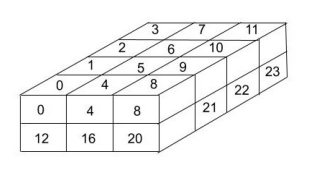

In [13]:
# A picture representation of this 3D array

d3_array = mpimg.imread('3_D_array_with_numbers.jpg')
plt.rcParams["figure.figsize"] = [12, 3]
plt.axis('off')
plt.imshow(d3_array) 
plt.show()

In [14]:
# Get the first row of values
# Notice that in Python and in most programming languagues, we use zero-based indexing

a_3d[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [15]:
# Get the first row and first column of values

a_3d[0][0]

array([0, 1, 2, 3])

In [16]:
# Get the value of the first element from first row and the first column

a_3d[0][0][0]

0

In [17]:
# Get the value from 2nd row, 2nd column and first element

a_3d[1][1][0]

16

__Exercise 1:__ Using our a_3d array, do the following:

1. Get the last row's data
2. Get the last row and last column of data
3. Get value for last element from the last row & last column


In [18]:
# 1
a_3d[1]

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [19]:
# 2
a_3d[1][2]

array([20, 21, 22, 23])

In [20]:
# 3
a_3d[1][2][3]

23

## Back to our Road Image

Now, let's go back to our road image.  How is it represented in python?

In [21]:
# How is our image represented?

print('The image road_img is of type ', type(road_img), 'and has dimesions:', road_img.shape)

The image road_img is of type  <class 'numpy.ndarray'> and has dimesions: (296, 582, 3)


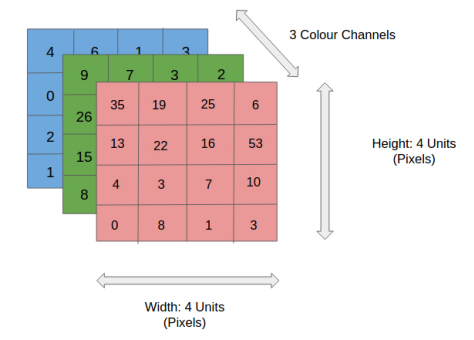

In [22]:
# The intensity of the color for Red, Green and Blue is represented by integers

kinds_of_array = mpimg.imread('picture_3d_array.jpg')
plt.rcParams["figure.figsize"] = [25, 6]
plt.axis('off')
plt.imshow(kinds_of_array) 
plt.show()

Our road image which is a 3-D array of size 296 x 582 x 3.

It is 296 pixels in height (number of rows) and 582 pixels in width (number of columns) with 3 color channels (number in depth).  Because it is just an array of numbers, you can perform arithmetic and other mathematical functions.

In [23]:
# Here, we get the top slice (i.e. first row) of the picture
road_img[0]

array([[115, 150, 190],
       [115, 150, 190],
       [115, 150, 190],
       ...,
       [128, 170, 212],
       [127, 169, 211],
       [126, 168, 210]], dtype=uint8)

In [24]:
# Get the first slice of the picture, then get the first column
# The result is that we have a tuple of (R, G, B) values

test = road_img[0][0]
print("type(test):", type(test))
print("length of the test tuple:", len(test))

type(test): <class 'numpy.ndarray'>
length of the test tuple: 3


In [25]:
test

array([115, 150, 190], dtype=uint8)

In [26]:
test[0]

115

### A Bit of Team Spirit

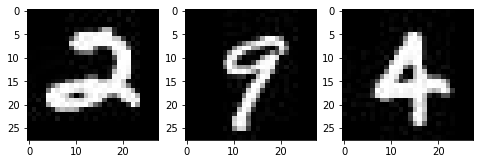

In [27]:
# check out some images from the famous handwritten digits of the MNIST dataset

digit2 = mpimg.imread('handwritten_2.jpg')
digit9 = mpimg.imread('handwritten_9.jpg')
digit4 = mpimg.imread('handwritten_4.jpg')

plt.figure(figsize=(8,3))

plt.subplot(1, 3, 1)
plt.imshow(digit2, cmap='gray')

plt.subplot(1, 3, 2)
plt.imshow(digit9, cmap='gray')

plt.subplot(1, 3, 3)
plt.imshow(digit4, cmap='gray')

plt.show()

## OpenCV Built-in Functions

In OpenCV, there are many built-in functions we can use without 
having to perform the matrix manipulations ourselves. Let's checkout out a few of them.

The function cv2.cvtColor([image], cv2.COLOR_BGR2GRAY) will convert a color picture
to a gray scaled picture.  In essence, it converts a 3-D array to a 2-D array.

In [28]:
### Grayscale

gray_road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2GRAY)

In [29]:
# Notice that the gray_road_img has now only 2 dimensions

print("Dimesion of the gray_road_img: ", gray_road_img.ndim)

Dimesion of the gray_road_img:  2


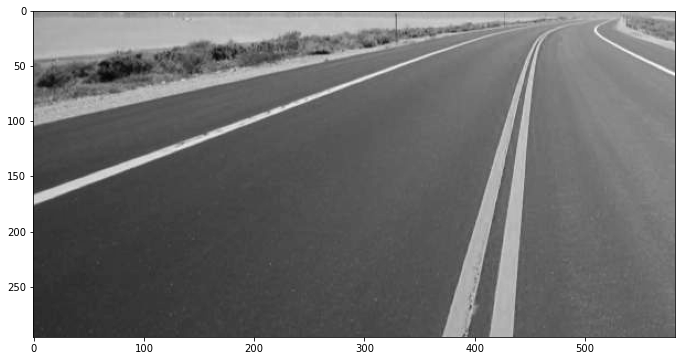

In [30]:
# Call as plt.imshow(gray, cmap='gray') to show a grayscaled image correctly here.

plt.imshow(gray_road_img, cmap='gray')
plt.show()

In [31]:
gray_road_img

array([[158, 158, 158, ..., 178, 177, 176],
       [149, 148, 148, ..., 167, 167, 167],
       [136, 135, 132, ..., 160, 161, 162],
       ...,
       [ 44,  47,  49, ..., 100,  99,  99],
       [ 45,  47,  47, ...,  98,  97,  96],
       [ 45,  46,  45, ...,  97,  96,  94]], dtype=uint8)

In [32]:
type(gray_road_img)

numpy.ndarray

In [33]:
# how many dimension?

gray_road_img.ndim

2

In [34]:
gray_road_img.shape

(296, 582)

In [35]:
# In 2-D array, you can use indexing to get values to specific rows, columns or combination of both 
# First row of data 

gray_road_img[0:1, 0:]

array([[158, 158, 158, 158, 159, 159, 160, 161, 160, 161, 162, 163, 164,
        166, 167, 166, 167, 168, 169, 170, 170, 169, 168, 167, 167, 167,
        167, 167, 167, 167, 167, 167, 167, 169, 171, 170, 168, 167, 168,
        170, 171, 172, 172, 169, 166, 165, 167, 170, 171, 170, 169, 167,
        166, 164, 163, 163, 167, 164, 162, 162, 165, 166, 166, 165, 167,
        166, 165, 167, 169, 169, 167, 164, 165, 167, 170, 170, 167, 166,
        166, 167, 166, 165, 166, 168, 171, 172, 169, 167, 166, 166, 167,
        168, 167, 166, 165, 165, 170, 169, 168, 167, 167, 167, 168, 168,
        172, 171, 170, 171, 172, 172, 169, 166, 169, 171, 172, 171, 169,
        169, 170, 172, 162, 175, 170, 165, 176, 178, 168, 167, 175, 170,
        167, 169, 175, 180, 180, 177, 180, 180, 181, 182, 182, 178, 173,
        169, 174, 174, 175, 175, 176, 177, 177, 178, 176, 177, 178, 179,
        180, 179, 178, 178, 174, 173, 173, 173, 173, 174, 176, 177, 178,
        176, 174, 172, 172, 173, 174, 175, 179, 176

__Exercise 2:__ Using our gray_road_img do the following :
        
1. Get the first column of data
2. Get the last 2 columns of data
3. Get the 1st to 5th column and 1st to 5th rows of data - it should show 25 values

In [45]:
# 1
gray_road_img[0:, 0:1]

array([[158],
       [149],
       [136],
       [136],
       [143],
       [141],
       [144],
       [158],
       [155],
       [156],
       [156],
       [156],
       [157],
       [158],
       [158],
       [159],
       [160],
       [160],
       [160],
       [160],
       [159],
       [159],
       [159],
       [160],
       [158],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [163],
       [158],
       [159],
       [158],
       [157],
       [159],
       [161],
       [162],
       [163],
       [165],
       [168],
       [172],
       [170],
       [154],
       [133],
       [120],
       [117],
       [126],
       [115],
       [106],
       [105],
       [105],
       [ 99],
       [ 93],
       [ 89],
       [ 91],
       [ 93],
       [ 94],
       [ 97],
       [ 96],
       [ 95],
       [ 93],
       [ 92],
       [ 94],
       [104],
       [105],
       [ 94],
       [ 88],
       [ 94],
       [104],
      

In [37]:
# 2
gray_road_img[0:, 580:582]

array([[177, 176],
       [167, 167],
       [161, 162],
       [166, 167],
       [167, 169],
       [167, 167],
       [172, 171],
       [184, 181],
       [197, 199],
       [177, 176],
       [154, 150],
       [142, 139],
       [136, 135],
       [132, 133],
       [132, 130],
       [135, 130],
       [128, 123],
       [134, 130],
       [138, 137],
       [133, 135],
       [122, 127],
       [117, 125],
       [123, 130],
       [129, 136],
       [146, 146],
       [138, 138],
       [131, 131],
       [134, 125],
       [154, 136],
       [180, 168],
       [190, 189],
       [182, 183],
       [186, 190],
       [187, 188],
       [185, 186],
       [172, 177],
       [153, 160],
       [139, 143],
       [137, 138],
       [142, 141],
       [135, 136],
       [135, 135],
       [134, 135],
       [134, 134],
       [132, 132],
       [131, 131],
       [130, 129],
       [129, 129],
       [133, 133],
       [135, 135],
       [131, 130],
       [127, 126],
       [125,

In [38]:
# 3
gray_road_img[0:5, 0:5]

array([[158, 158, 158, 158, 159],
       [149, 148, 148, 147, 147],
       [136, 135, 132, 131, 130],
       [136, 134, 130, 128, 129],
       [143, 141, 137, 135, 136]], dtype=uint8)

### Get a portion of the gray road image

Now, we know that the gray road image is essentially a 2-D array.  We can use array subsetting technique to get a small portion of the image.  Recall that the image is a 2-D array with the following dimension.

In [39]:
(nrow, ncol) = gray_road_img.shape

print ("number of rows is %i and number of columns is %i" %(nrow, ncol))

number of rows is 296 and number of columns is 582


In [40]:
small_gray_road_img = gray_road_img[0:100, 0:200]

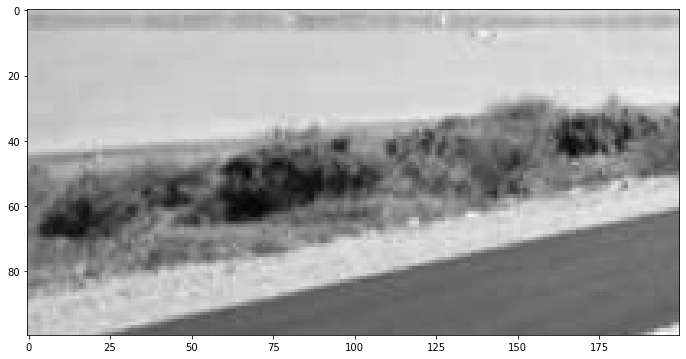

In [41]:
# Call as plt.imshow(gray, cmap='gray') to show a grayscaled image correctly here.

plt.imshow(small_gray_road_img, cmap='gray')
plt.show()

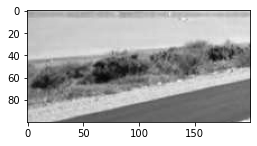

In [42]:
# Control the size of the image for output
plt.rcParams["figure.figsize"] = [4, 3]

plt.imshow(small_gray_road_img, cmap='gray') 
plt.show()

__Exercise 3:__ Display the upper right corner of the grayscale road image with size 100 x 200 pixels.

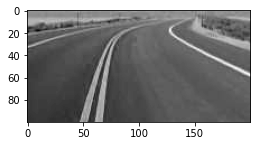

In [43]:
gray_road_top_right_img = gray_road_img[0:100, 382:582]
plt.imshow(gray_road_top_right_img, cmap='gray')
plt.show()